<p align="center">
<a href="https://t.me/immelst0run">
  <img src="https://img.shields.io/badge/t.me/immelst0run-blue?logo=telegram&logoColor=yellow" alt="TG profile">
 </a>
</p>

<p align="center">
  <a href="https://github.com/immelstorun">
    <img src="https://img.shields.io/badge/-immelstorun-blue?style=flat&logo=github" alt="GitHub Repo">
  </a>
</p>



<p align="center">
  <img src="https://img.shields.io/badge/python_3.11-3670A0?style=for-the-badge&logo=python&logoColor=ffdd54" style="border-radius: 5px;" />
  <img src="https://img.shields.io/badge/pandas-%23150458.svg?style=for-the-badge&logo=pandas&logoColor=white" style="border-radius: 5px;" />
  <img src="https://img.shields.io/badge/scikit--learn-%23F7931E.svg?style=for-the-badge&logo=scikit-learn&logoColor=white" style="border-radius: 5px;" />
  <img src="https://img.shields.io/badge/scipy-red.svg?style=for-the-badge&logo=scipy&logoColor=white" style="border-radius: 5px;" />
</p>

<h1 align="center">Пространственная транскриптомика в онкологии</h1>
<p align="center">Цель проекта - поиск отличий в организации микроокружения у пожилых и молодых пациентов.</p>

## Описание проекта
Прикладной анализ данных и статистическоe обоснование гипотез по тестам и графикам статической значимости на основе биомедицинского датасета по пространственной транскриптомике пациентов с плоскоклеточным раком.

## Описание данных

Биоинформатический датасет (в каталоге `data`) по пространственной транскриптомике пациентов с плоскоклеточным раком. В нем клетки (колонка `cell_type`) объединены в микроокружения (колонка `cell_interaction`) в зависимости от взаимодействия этих клеток.

Также в датасете есть следующие колонки:

* `distance_to_vasculature` — расстояние до ближайших сосудов;
* `distance_to_largest_cell` — расстояние до ближайшей крупной клетки;
* `immune_marker_1` — экспрессия иммунного маркера 1 в данной клетке;
* `immune_marker_2` — экспрессия иммунного маркера 2 в данной клетке;
* `cell_type` — тип клетки;
* `area_of_cell` — размер клетки;
* `case_id` — уникальный ID пациента.

## Задачи от заказчика
Смотри readme.md или непосредственно к каждой задаче

## Критерии оценки результата
Смотри readme.md

## План работы
- Шаг 1: Подготовка данных
    - Загрузка данных
    - Предобработка датасетов (Пропуски и явные дубликаты)
  
- Шаг 2: Итеративный проход по задачам заказчика
    - 1. Формулирование задачи
    - 2. Формирование выборки
    - 3. Графическое описание характеристик выборки
    - 4. Проведение статистического анализа
    - 5. Подробное описание результатов анализа и сделанных на их основе выводов. 
       > Подробнее в readme.md 
    - Оценка значимости и величины эффектов
      >Подробнее в readme.md 
    - Описание ограничений проведенного анализа и возможных улучшений. 
      >Подробнее в readme.md 

- Шаг 3: Формулирование общих выводов по проекту

## Шаг 1: Подготовка данных

### Импорты

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from concurrent.futures import ProcessPoolExecutor
from tqdm.auto import tqdm

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# кастомные функции
from utils import df_info # Функция для получения информации о датафрейме
from utils import low_information_features # Функция для определения неинформативных признаков в датафрейме.
from utils import plot_missing_values # Функция для построения столбчатой диаграммы, отображающей процент пропущенных значений в каждом столбце датафрейма.
from utils import plot_sample_data # Функция для создания графиков QQ, гистограмм и boxplot для двух выборок.
from utils import remove_outliers # Функция для удаления выбросов.

ALPHA = 0.05

### Загрузка датасета

In [2]:
community = pd.read_csv('data/community_dataset.csv')

In [3]:
# Общий обзор
df_info(community)

Количество записей: 	 269442
Количество столбцов: 	 9
Явных дубликатов: 	 0
Пропуски присутствуют в 0 столбцах из 9:


,Пропущено %


Обобщенная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269442 entries, 0 to 269441
Columns: 9 entries, distance_to_vasculature to age_group
dtypes: float64(4), int64(2), object(3)
memory usage: 18.5+ MB


None

Первые 3 строки:


,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group


In [4]:
# Малоинформативные признаки
low_information_features(community)

distance_to_vasculature: 100.0% уникальных значений
distance_to_largest_cell: 100.0% уникальных значений


['distance_to_vasculature', 'distance_to_largest_cell']

### Выводы

Пропуски и явные дубликаты отсутствуют.
Признаки, имеющие 100% уникальных згачений, возможно нуждаются в преобразовании, например округление. Пока оставляем, как есть.

 ## Шаг 2: Решение задач заказчика

### Задача_01

#### 1. Формулирование задачи

* `task_01_a`: Есть ли стат-значимость между типом клетки `cell_type` и размером клетки `area_of_cell`), добавьте hue по возрастным группам.


* `task_01_b`: Есть ли стат-значимость между типом клетки `cell_type` и экспрессией иммунных маркеров (`immune_marker_1`, `immune_marker_2`), добавьте hue по возрастным группам.

* `task_01_c`: Есть ли стат-значимость между типом клетки `cell_type` и Дистанцией до ближайших объектов (`distance_to_vasculature`, `distance_to_largest_cell`), добавьте hue по возрастным группам.

#### 2. Формирование выборки

In [5]:
task_01_a = community[['case_id', 'cell_type', 'area_of_cell', 'age_group']]
task_01_b = community[['case_id','immune_marker_1', 'immune_marker_2', 'cell_type', 'age_group']]
task_01_c = community[['case_id','distance_to_vasculature', 'distance_to_largest_cell', 'cell_type', 'age_group']]

In [6]:
df_info(task_01_b)

Количество записей: 	 269442
Количество столбцов: 	 5
Явных дубликатов: 	 1
Пропуски присутствуют в 0 столбцах из 5:


,Пропущено %


Обобщенная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269442 entries, 0 to 269441
Columns: 5 entries, case_id to age_group
dtypes: float64(2), int64(1), object(2)
memory usage: 10.3+ MB


None

Первые 3 строки:


,case_id,immune_marker_1,immune_marker_2,cell_type,age_group
0,891,10.803755,187.998971,Stroma cells,elder_group
1,891,11.749179,155.357076,Stroma cells,elder_group
2,891,15.124372,182.626888,Stroma cells,elder_group


#### 3. Графическое описание характеристик выборки

In [7]:
# Удаление выбросов
task_01_a = remove_outliers(task_01_a, 'cell_type', 'area_of_cell', threshold=2.5)

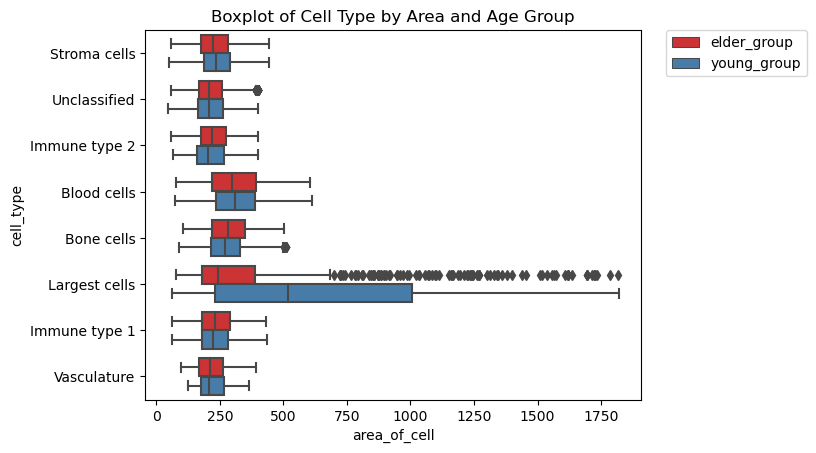

In [8]:
# Создаем boxplot
sns.boxplot(x='area_of_cell', y='cell_type', hue='age_group', data=task_01_a, palette="Set1")
plt.title('Boxplot of Cell Type by Area and Age Group')

# Для лучшей читаемости
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [9]:
task_01_b = remove_outliers(task_01_b, 'cell_type', 'immune_marker_1', threshold=2.5)
task_01_b = remove_outliers(task_01_b, 'cell_type', 'immune_marker_2', threshold=2.5)

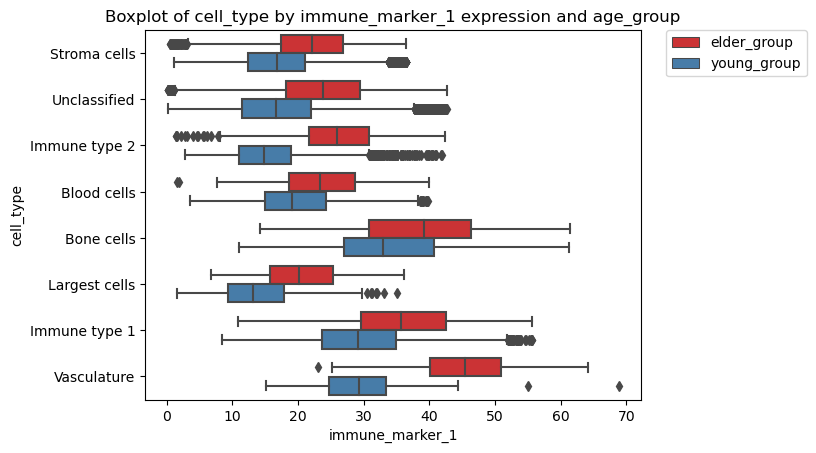

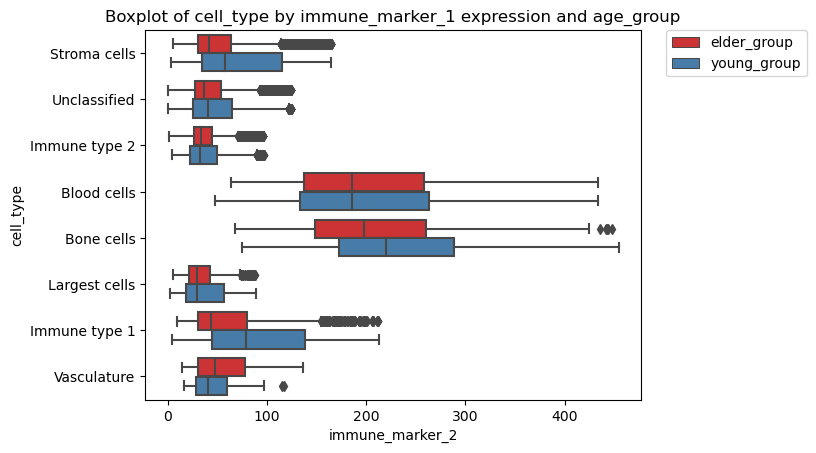

In [10]:
# Создаем boxplot
sns.boxplot(x='immune_marker_1', y='cell_type', hue='age_group', data=task_01_b, palette="Set1")
plt.title(f'Boxplot of cell_type by immune_marker_1 expression and age_group')

# Для лучшей читаемости
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Создаем boxplot
sns.boxplot(x='immune_marker_2', y='cell_type', hue='age_group', data=task_01_b, palette="Set1")
plt.title(f'Boxplot of cell_type by immune_marker_1 expression and age_group')

# Для лучшей читаемости
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [11]:
task_01_c = remove_outliers(task_01_c, 'cell_type', 'distance_to_vasculature', threshold=2.5)
task_01_c = remove_outliers(task_01_c, 'cell_type', 'distance_to_largest_cell', threshold=2.5)

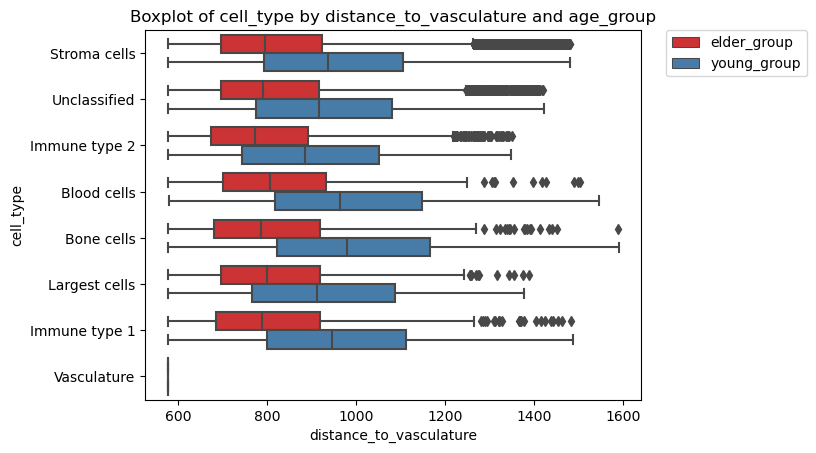

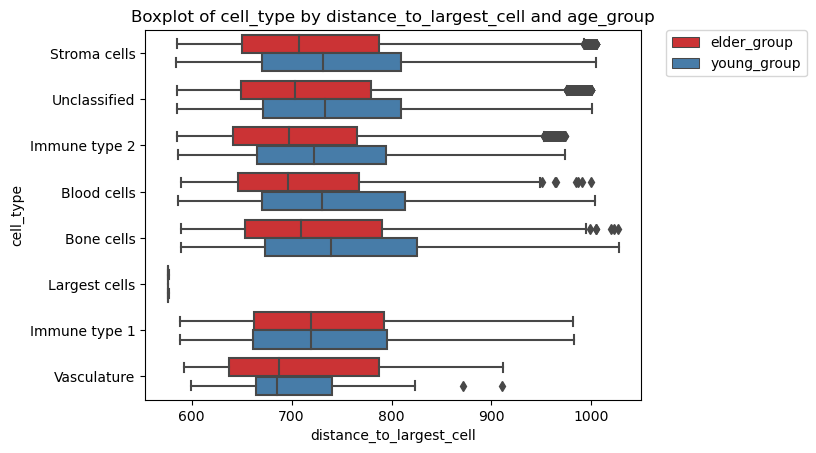

In [12]:
# Создаем boxplot
sns.boxplot(x='distance_to_vasculature', y='cell_type', hue='age_group', data=task_01_c, palette="Set1")
plt.title(f'Boxplot of cell_type by distance_to_vasculature and age_group')

# Для лучшей читаемости
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Создаем boxplot
sns.boxplot(x='distance_to_largest_cell', y='cell_type', hue='age_group', data=task_01_c, palette="Set1")
plt.title(f'Boxplot of cell_type by distance_to_largest_cell and age_group')

# Для лучшей читаемости
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### 4. Проведение статистического анализа

Обоснование выбора статтеста:

Для выявления статистической значимости между типом клетки и размером клетки возможно применить статичтический тест, который сравнивает средние значения между несколькими группами типов клеток. Таким тестом является ANOVA. Поскольку `cell_type` является категориальной переменной, а `остальные показатели` является численным значением - можно выбрать односторонний ANOVA.
Данный тест будем проводить  отдельно для каждой возрастной группы. 

In [13]:
# Выполнение однофакторного дисперсионного анализа для каждой возрастной группы по area_of_cell

for age_group_value in task_01_a['age_group'].unique():
    H0_age_group = f'Нет разницы в средних значениях размеров клеток между типами клеток в возрастной группе {age_group_value}'
    H1_age_group = f'Есть значимая разница в средних значениях размеров клеток между типами клеток в возрастной группе {age_group_value}'
    f_value_age_group, p_value_age_group = stats.f_oneway(
        *[task_01_a[(task_01_a['cell_type'] == cell) & (task_01_a['age_group'] == age_group_value)]['area_of_cell'] for cell in task_01_a['cell_type'].unique()]
    )
    print(f'F-value for age group {age_group_value}:', f_value_age_group)
    print(f'P-value for age group {age_group_value}:', p_value_age_group)
    if p_value_age_group < ALPHA:
        print(f'Отвергаем нулевую гипотезу для возрастной группы {age_group_value}')
        print(f'Принимаем альтернативную гипотезу для возрастной группы {age_group_value}: {H1_age_group}')
        print('')
    else:
        print(f'Нет оснований отвергнуть нулевую гипотезу для возрастной группы {age_group_value}')
        print(f'Принимаем нулевую гипотезу для возрастной группы {age_group_value}: {H0_age_group}')
        print('')

F-value for age group elder_group: 622.3308428594653
P-value for age group elder_group: 0.0
Отвергаем нулевую гипотезу для возрастной группы elder_group
Принимаем альтернативную гипотезу для возрастной группы elder_group: Есть значимая разница в средних значениях размеров клеток между типами клеток в возрастной группе elder_group

F-value for age group young_group: 3815.8208921333858
P-value for age group young_group: 0.0
Отвергаем нулевую гипотезу для возрастной группы young_group
Принимаем альтернативную гипотезу для возрастной группы young_group: Есть значимая разница в средних значениях размеров клеток между типами клеток в возрастной группе young_group



In [14]:
# Выполнение однофакторного дисперсионного анализа для каждой возрастной группы по immune_marker_1

for age_group_value in task_01_b['age_group'].unique():
    H0_age_group = f'Нет разницы в средних значениях экспресии immune_marker_1 между типами клеток в возрастной группе {age_group_value}'
    H1_age_group = f'Есть значимая разница в средних значениях экспресии immune_marker_1 между типами клеток в возрастной группе {age_group_value}'
    f_value_age_group, p_value_age_group = stats.f_oneway(
        *[task_01_b[(task_01_b['cell_type'] == cell) & (task_01_b['age_group'] == age_group_value)]['immune_marker_1'] for cell in task_01_b['cell_type'].unique()]
    )
    print(f'F-value for age group {age_group_value}:', f_value_age_group)
    print(f'P-value for age group {age_group_value}:', p_value_age_group)
    if p_value_age_group < ALPHA:
        print(f'Отвергаем нулевую гипотезу для возрастной группы {age_group_value}')
        print(f'Принимаем альтернативную гипотезу для возрастной группы {age_group_value}: {H1_age_group}')
        print('')
    else:
        print(f'Нет оснований отвергнуть нулевую гипотезу для возрастной группы {age_group_value}')
        print(f'Принимаем нулевую гипотезу для возрастной группы {age_group_value}: {H0_age_group}')
        print('')

F-value for age group elder_group: 1323.2004344004704
P-value for age group elder_group: 0.0
Отвергаем нулевую гипотезу для возрастной группы elder_group
Принимаем альтернативную гипотезу для возрастной группы elder_group: Есть значимая разница в средних значениях экспресии immune_marker_1 между типами клеток в возрастной группе elder_group

F-value for age group young_group: 4051.179425217215
P-value for age group young_group: 0.0
Отвергаем нулевую гипотезу для возрастной группы young_group
Принимаем альтернативную гипотезу для возрастной группы young_group: Есть значимая разница в средних значениях экспресии immune_marker_1 между типами клеток в возрастной группе young_group



In [15]:
# Выполнение однофакторного дисперсионного анализа для каждой возрастной группы по immune_marker_2

for age_group_value in task_01_b['age_group'].unique():
    H0_age_group = f'Нет разницы в средних значениях экспресии immune_marker_2 между типами клеток в возрастной группе {age_group_value}'
    H1_age_group = f'Есть значимая разница в средних значениях экспресии immune_marker_2 между типами клеток в возрастной группе {age_group_value}'
    f_value_age_group, p_value_age_group = stats.f_oneway(
        *[task_01_b[(task_01_b['cell_type'] == cell) & (task_01_b['age_group'] == age_group_value)]['immune_marker_2'] for cell in task_01_b['cell_type'].unique()]
    )
    print(f'F-value for age group {age_group_value}:', f_value_age_group)
    print(f'P-value for age group {age_group_value}:', p_value_age_group)
    if p_value_age_group < ALPHA:
        print(f'Отвергаем нулевую гипотезу для возрастной группы {age_group_value}')
        print(f'Принимаем альтернативную гипотезу для возрастной группы {age_group_value}: {H1_age_group}')
        print('')
    else:
        print(f'Нет оснований отвергнуть нулевую гипотезу для возрастной группы {age_group_value}')
        print(f'Принимаем нулевую гипотезу для возрастной группы {age_group_value}: {H0_age_group}')
        print('')

F-value for age group elder_group: 3380.911610356719
P-value for age group elder_group: 0.0
Отвергаем нулевую гипотезу для возрастной группы elder_group
Принимаем альтернативную гипотезу для возрастной группы elder_group: Есть значимая разница в средних значениях экспресии immune_marker_2 между типами клеток в возрастной группе elder_group

F-value for age group young_group: 9350.368730258693
P-value for age group young_group: 0.0
Отвергаем нулевую гипотезу для возрастной группы young_group
Принимаем альтернативную гипотезу для возрастной группы young_group: Есть значимая разница в средних значениях экспресии immune_marker_2 между типами клеток в возрастной группе young_group



In [16]:
# Выполнение однофакторного дисперсионного анализа для каждой возрастной группы по distance_to_vasculature

for age_group_value in task_01_c['age_group'].unique():
    H0_age_group = f'Нет разницы в средних значениях экспресии distance_to_vasculature между типами клеток в возрастной группе {age_group_value}'
    H1_age_group = f'Есть значимая разница в средних значениях экспресии distance_to_vasculature между типами клеток в возрастной группе {age_group_value}'
    f_value_age_group, p_value_age_group = stats.f_oneway(
        *[task_01_c[(task_01_c['cell_type'] == cell) & (task_01_c['age_group'] == age_group_value)]['distance_to_vasculature'] for cell in task_01_c['cell_type'].unique()]
    )
    print(f'F-value for age group {age_group_value}:', f_value_age_group)
    print(f'P-value for age group {age_group_value}:', p_value_age_group)
    if p_value_age_group < ALPHA:
        print(f'Отвергаем нулевую гипотезу для возрастной группы {age_group_value}')
        print(f'Принимаем альтернативную гипотезу для возрастной группы {age_group_value}: {H1_age_group}')
        print('')
    else:
        print(f'Нет оснований отвергнуть нулевую гипотезу для возрастной группы {age_group_value}')
        print(f'Принимаем нулевую гипотезу для возрастной группы {age_group_value}: {H0_age_group}')
        print('')

F-value for age group elder_group: 50.89180977021285
P-value for age group elder_group: 8.564666452407848e-73
Отвергаем нулевую гипотезу для возрастной группы elder_group
Принимаем альтернативную гипотезу для возрастной группы elder_group: Есть значимая разница в средних значениях экспресии distance_to_vasculature между типами клеток в возрастной группе elder_group

F-value for age group young_group: 158.59146617141184
P-value for age group young_group: 1.103636151666557e-234
Отвергаем нулевую гипотезу для возрастной группы young_group
Принимаем альтернативную гипотезу для возрастной группы young_group: Есть значимая разница в средних значениях экспресии distance_to_vasculature между типами клеток в возрастной группе young_group



In [17]:
# Выполнение однофакторного дисперсионного анализа для каждой возрастной группы по distance_to_largest_cell

for age_group_value in task_01_c['age_group'].unique():
    H0_age_group = f'Нет разницы в средних значениях экспресии distance_to_largest_cell между типами клеток в возрастной группе {age_group_value}'
    H1_age_group = f'Есть значимая разница в средних значениях экспресии distance_to_largest_cell между типами клеток в возрастной группе {age_group_value}'
    f_value_age_group, p_value_age_group = stats.f_oneway(
        *[task_01_c[(task_01_c['cell_type'] == cell) & (task_01_c['age_group'] == age_group_value)]['distance_to_largest_cell'] for cell in task_01_c['cell_type'].unique()]
    )
    print(f'F-value for age group {age_group_value}:', f_value_age_group)
    print(f'P-value for age group {age_group_value}:', p_value_age_group)
    if p_value_age_group < ALPHA:
        print(f'Отвергаем нулевую гипотезу для возрастной группы {age_group_value}')
        print(f'Принимаем альтернативную гипотезу для возрастной группы {age_group_value}: {H1_age_group}')
        print('')
    else:
        print(f'Нет оснований отвергнуть нулевую гипотезу для возрастной группы {age_group_value}')
        print(f'Принимаем нулевую гипотезу для возрастной группы {age_group_value}: {H0_age_group}')
        print('')

F-value for age group elder_group: 327.4414806656561
P-value for age group elder_group: 0.0
Отвергаем нулевую гипотезу для возрастной группы elder_group
Принимаем альтернативную гипотезу для возрастной группы elder_group: Есть значимая разница в средних значениях экспресии distance_to_largest_cell между типами клеток в возрастной группе elder_group

F-value for age group young_group: 513.3936016916364
P-value for age group young_group: 0.0
Отвергаем нулевую гипотезу для возрастной группы young_group
Принимаем альтернативную гипотезу для возрастной группы young_group: Есть значимая разница в средних значениях экспресии distance_to_largest_cell между типами клеток в возрастной группе young_group



#### 5. Подробное описание результатов анализа и сделанных на их основе выводов. 

На основе проведенного ANOVA теста (анализа дисперсии) для двух возрастных групп `elder_group` и `young_group` получены следующие значения F-статистики и соответствующие p-значения:

* Так как `p-значение` в всех случаях равно 0.0 или близко к 0, это говорит о том, что мы отвергаем нулевую гипотезу и принимаем альтернативную, считая, что есть статистически значимые различия в средних размерах клеток между типами клеток в обеих возрастных группах.

#### 6. Оценка значимости и величины эффектов

Размер эффекта можно оценить, используя значения F-статистики. Чем выше значение F, тем больше величина эффекта. 

В данном случае, очень высокие значения F-статистики для обеих групп указывают на значительное влияние фактора `cell_type` исследуемые параметры в этих возрастных группах.

#### 7. Описание ограничений проведенного анализа и возможных улучшений. 

Ограничения анализа могут включать следующее:

`Размер выборки:` Маленький размер выборки может не отражать всего разнообразия популяции и вести к ошибкам в выводах.

`Выбросы:` Наличие выбросов может существенно исказить результаты.

`Нарушение предпосылок ANOVA:` ANOVA требует нормальности распределения данных и гомогенности дисперсий. Нарушение этих условий может привести к неверным результатам.
Для улучшения результатов анализа можно предложить следующие шаги:

`Увеличение выборки:` Сбор данных по большему количеству наблюдений позволит уменьшить случайную ошибку и повысить точность оценок.

`Использование робастных методов: `Это поможет уменьшить влияние выбросов на результаты анализа.

`Проверка предпосылок:` Перед проведением ANOVA нужно убедиться, что данные удовлетворяют всем необходимым предпосылкам, и в случае их нарушения использовать альтернативные методы.

### Задача_02

#### 1. Формулирование задачи

В каком клеточном микроокружении клеток какого типа статистически больше, чем в других микроокружениях? (колонка `cell_interaction`). Для ответа используйте box_plot/swarplot с hue по микроокружениям, где:

* по Ох будут типы клеток,
* по Оу — их количество.

Не забудьте посчитать количество для каждого пациента отдельно, иначе выборка не будет репрезентативной.

Нам нужно группировать исходные данные по трем критериям:
- Уникальному идентификатору, который отличает одну запись от другой (например, идентификатор пациента).
- Типу объекта, который мы анализируем (например, тип клетки).
- Категории или среде, в которой находится этот объект (например, микроокружение клетки).
После группировки данных по этим трем критериям, подсчитываем количество записей в каждой группе. Это количество записей представляет собой количество объектов (например, количество клеток) в соответствующей комбинации идентификатора, типа объекта и категории.
Затем преобразуем эти сгруппированные данные обратно в формат таблицы, где каждая строка представляет одну комбинацию идентификатора, типа объекта и категории, а соответствующее количество записей в этой группе становится значением в новом столбце, который мы назвали "количество объектов".
Таким образом, мы получаем таблицу, где каждая строка содержит идентификатор, тип объекта, категорию и количество объектов для этой конкретной комбинации. Эта таблица может быть использована для дальнейшего анализа и визуализации данных.

#### 2. Формирование выборки

In [18]:
task_02 = community[
    ['case_id', 'cell_type', 'cell_interaction']].groupby(
        ['case_id', 'cell_type', 'cell_interaction']).size().reset_index(name='count')

In [19]:
df_info(task_02)

Количество записей: 	 371
Количество столбцов: 	 4
Явных дубликатов: 	 0
Пропуски присутствуют в 0 столбцах из 4:


,Пропущено %


Обобщенная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Columns: 4 entries, case_id to count
dtypes: int64(2), object(2)
memory usage: 11.7+ KB


None

Первые 3 строки:


,case_id,cell_type,cell_interaction,count
0,40,Blood cells,community_1,37
1,40,Blood cells,community_2,40
2,40,Blood cells,community_3,20


#### 3. Графическое описание характеристик выборки

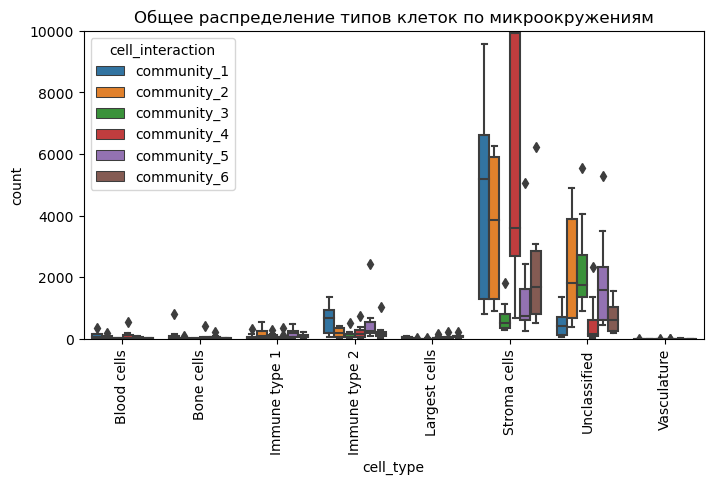

In [20]:
y_lim = 10000

plt.figure(figsize=(8, 4))
ax = sns.boxplot(x='cell_type', y='count', hue='cell_interaction', data=task_02)

ax.set_ylim(0, y_lim)
plt.title('Общее распределение типов клеток по микроокружениям')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


In [21]:
# Лидерборд типов клеток в каждом микроокружении

# Формируем выборку с максимальными значениями количества по всем трем критериям
task_02_max_counts_indices = task_02.groupby(['case_id', 'cell_interaction'])['count'].idxmax()
task_02_summary = task_02.loc[task_02_max_counts_indices]
df_info(task_02_summary)


Количество записей: 	 48
Количество столбцов: 	 4
Явных дубликатов: 	 0
Пропуски присутствуют в 0 столбцах из 4:


,Пропущено %


Обобщенная информация:
<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 30 to 361
Columns: 4 entries, case_id to count
dtypes: int64(2), object(2)
memory usage: 1.9+ KB


None

Первые 3 строки:


,case_id,cell_type,cell_interaction,count
30,40,Stroma cells,community_1,5522
31,40,Stroma cells,community_2,4994
38,40,Unclassified,community_3,5549


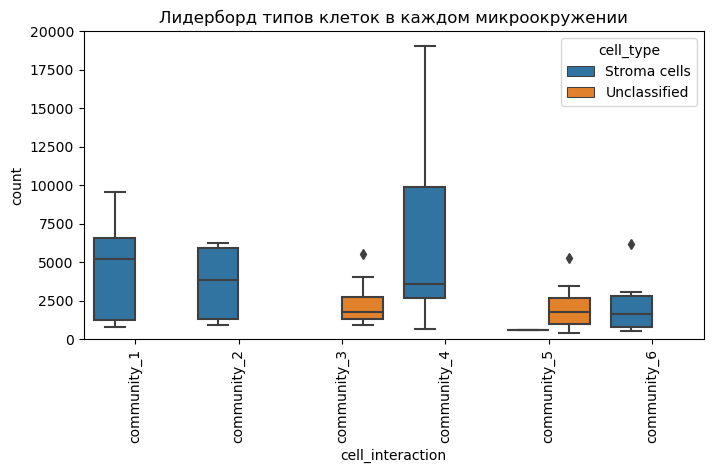

In [22]:
plt.figure(figsize=(8, 4))
ax = sns.boxplot(data=task_02_summary, x='cell_interaction', y='count', hue='cell_type')

ax.set_ylim(0, 20000)
plt.title('Лидерборд типов клеток в каждом микроокружении')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Почти во всех микроокружениях максимально представлены клетки типа `stroma_cells`

#### 4. Проведение статистического анализа

Для проверки статистической значимости различий в количестве клеток разных типов по типам микроокружений, можно использовать следующие статистические тесты:

* ANOVA (Analysis of Variance): Если данные удовлетворяют предположениям нормальности распределения и гомогенности дисперсий, можно использовать однофакторный ANOVA для сравнения средних значений количества клеток между различными микроокружениями.
* Критерий Краскела-Уоллиса: Это непараметрический аналог ANOVA, который можно использовать, если данные не соответствуют нормальному распределению. Он оценивает, есть ли статистически значимые различия между медианами групп.
* Пост-хок тесты: Если ANOVA или Критерий Краскела-Уоллиса показывают наличие значимых различий, можно провести пост-хок тесты (например, Тьюки или Данна) для определения, между какими конкретными группами существуют различия.

In [23]:
# Kruskal-Wallis test
H0 = f'Нет статистически значимой разницы в максимальных значениях количества клеток между микроокружениями'
H1 = f'Есть статистически значимая разница в максимальных значениях количества клеток между микроокружениями'
task_02_result = stats.kruskal(*[group["count"] for name, group in task_02_summary.groupby("cell_type")])

# test result
print("Kruskal-Wallis test statistic:", task_02_result.statistic)
print("Kruskal-Wallis test p-value:", task_02_result.pvalue)

# Interpret the result
if task_02_result.pvalue < ALPHA:
    print(f'Поскольку p-value ({task_02_result.pvalue}) меньше ALPHA ({ALPHA}), отвергаем нулевую гипотезу')
    print(f'{H1}')
else:
    print(f'Поскольку p-value ({task_02_result.pvalue}) больше ALPHA ({ALPHA}), мы не можем отвергнуть нулевую гипотезу')
    print(f'{H0}')


Kruskal-Wallis test statistic: 1.4160791589362702
Kruskal-Wallis test p-value: 0.2340498338383572
Поскольку p-value (0.2340498338383572) больше ALPHA (0.05), мы не можем отвергнуть нулевую гипотезу
Нет статистически значимой разницы в максимальных значениях количества клеток между микроокружениями


#### 5. Подробное описание результатов анализа и сделанных на их основе выводов. 

После проведения графического анализа было установлено наличие различий в количестве стромальных клеток по сравнению с другими типами клеток в большинстве микроокружений, кроме community_3 и Community_5. В данных микроокружениях преобладали клетки типа Unclassified.

Поскольку p-value (0.2340498338383572) больше ALPHA (0.05), мы не можем отвергнуть нулевую гипотезу
Нет статистически значимой разницы в максимальных значениях количества клеток между микроокружениями


#### 6. Оценка значимости и величины эффектов

Тест не показал значимых различий, следовательно, мы не можем говорить о значимости эффектов. Величина эффекта (различия между группами) также не является статистически значимой.

#### 7. Описание ограничений проведенного анализа и возможных улучшений. 

Ограничения проведенного анализа:

Kruskal-Wallis тест является непараметрическим и не предполагает нормальное распределение данных, но он также менее мощный, чем параметрические аналоги при наличии нормального распределения.
Тест не выявляет, между какими конкретно группами существуют различия, если они обнаруживаются.
Размер выборки и распределение данных внутри групп также могут повлиять на результаты теста.
Возможные улучшения:

Использовать пост-хок анализ для выявления групп, между которыми существуют различия, в случае если тест обнаруживает статистически значимые различия.
Увеличить размер выборки для повышения мощности теста.
Провести дополнительные анализы с использованием параметрических методов, если данные удовлетворяют предпосылкам этих методов (например, ANOVA при нормальности распределений).


### Задача_03

#### 1. Формулирование задачи

Есть ли разница в доле микроокружения в тканях пациентов разных возрастов? Для ответа используйте box_plot/swarplot с hue по возрастным группам, где:

по Ох будут микроокружения,
по Оу — их доля в ткани пациента.
Не забудьте посчитать доли для каждого пациента отдельно, иначе выборка не будет репрезентативной.

#### 2. Формирование выборки

In [24]:
task_03 = community[
    ['case_id', 'age_group', 'cell_interaction']].groupby(
        ['case_id', 'age_group', 'cell_interaction']).size().reset_index(name='count')

# Расчет общего количества клеток для каждого case_id
total_counts = task_03.groupby('case_id')['count'].transform('sum')

# Расчет доли каждого микроокружения each cell_interaction внутри каждого case_id
task_03['%_proportion'] = task_03['count'] / total_counts * 100

task_03 = task_03[['case_id', 'age_group', 'cell_interaction', '%_proportion']]

In [25]:
df_info(task_03)

Количество записей: 	 48
Количество столбцов: 	 4
Явных дубликатов: 	 0
Пропуски присутствуют в 0 столбцах из 4:


,Пропущено %


Обобщенная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Columns: 4 entries, case_id to %_proportion
dtypes: float64(1), int64(1), object(2)
memory usage: 1.6+ KB


None

Первые 3 строки:


,case_id,age_group,cell_interaction,%_proportion
0,40,elder_group,community_1,14.823619
1,40,elder_group,community_2,15.448843
2,40,elder_group,community_3,16.483560


#### 3. Графическое описание характеристик выборки

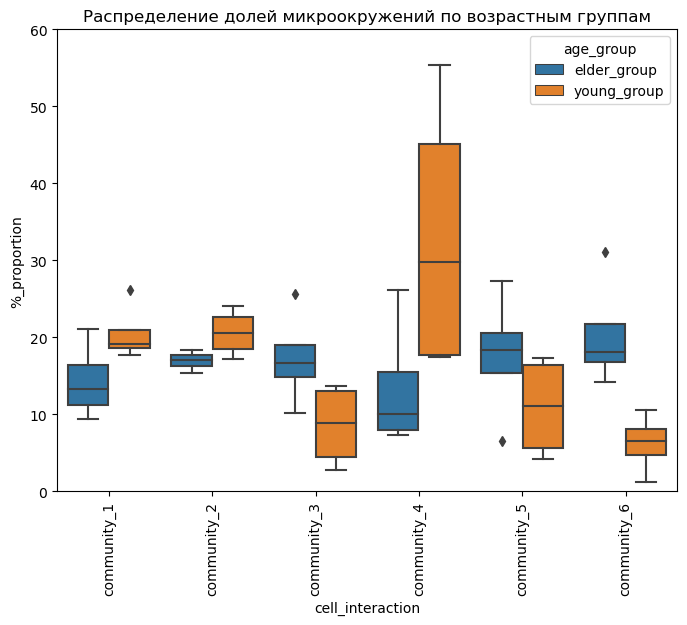

In [26]:
y_lim = 60

plt.figure(figsize=(8,6))
ax = sns.boxplot(x='cell_interaction', y='%_proportion', hue='age_group', data=task_03)

ax.set_ylim(0, y_lim)
plt.title('Распределение долей микроокружений по возрастным группам')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

#### 4. Проведение статистического анализа

In [27]:
# Kruskal-Wallis test
H0 = f'Нет разницы в доле микроокружения в тканях пациентов разных возрастов'
H1 = f'Есть разница в доле микроокружения в тканях пациентов разных возрастов'
task_03_result = stats.kruskal(*[group["%_proportion"] for name, group in task_03.groupby("age_group")])

# test result
print("Kruskal-Wallis test statistic:", task_03_result.statistic)
print("Kruskal-Wallis test p-value:", task_03_result.pvalue)

# Interpret the result
if task_03_result.pvalue < ALPHA:
    print(f'Поскольку p-value ({task_03_result.pvalue}) меньше ALPHA ({ALPHA}), отвергаем нулевую гипотезу')
    print(f'{H1}')
else:
    print(f'Поскольку p-value ({task_03_result.pvalue}) больше ALPHA ({ALPHA}), мы не можем отвергнуть нулевую гипотезу')
    print(f'{H0}')

Kruskal-Wallis test statistic: 0.22491496598638605
Kruskal-Wallis test p-value: 0.6353202111200327
Поскольку p-value (0.6353202111200327) больше ALPHA (0.05), мы не можем отвергнуть нулевую гипотезу
Нет разницы в доле микроокружения в тканях пациентов разных возрастов


#### 5. Подробное описание результатов анализа и сделанных на их основе выводов. 

Поскольку p-value (0.6353202111200326) больше ALPHA (0.05), мы не можем отвергнуть нулевую гипотезу
Нет разницы в доле микроокружения в тканях пациентов разных возрастов

#### 6. Оценка значимости и величины эффектов

Значимость результатов:

Поскольку p-значение (0.6353202111200326) значительно превышает установленный уровень значимости ALPHA (0.05), результаты теста указывают на отсутствие статистически значимых различий в долях микроокружения в тканях пациентов разных возрастных групп.
Статистическая значимость в контексте Kruskal-Wallis теста относится к вероятности отклонения нулевой гипотезы при условии, что она верна. В данном случае, высокое p-значение свидетельствует о том, что наблюдаемые различия в долях микроокружения могли возникнуть случайно.

Величина эффектов:

Величина эффекта описывает степень, до которой независимая переменная (возраст) влияет на зависимую переменную (долю микроокружения).
Поскольку Kruskal-Wallis тест не предоставляет прямую меру величины эффекта, мы не можем количественно оценить это влияние на основе предоставленной статистики. Для получения такой меры можно было бы рассмотреть расчет таких показателей, как eta-квадрат (η²) или других мер размера эффекта, подходящих для непараметрических тестов.
В данном случае, низкая статистическая значимость подразумевает, что любая величина эффекта, если она и существует, скорее всего, невелика.

#### 7. Описание ограничений проведенного анализа и возможных улучшений. 

Ограничения проведенного анализа:

Kruskal-Wallis тест является непараметрическим и не предполагает нормальное распределение данных, но он также менее мощный, чем параметрические аналоги при наличии нормального распределения.
Тест не выявляет, между какими конкретно группами существуют различия, если они обнаруживаются.
Размер выборки и распределение данных внутри групп также могут повлиять на результаты теста.
Возможные улучшения:

Использовать пост-хок анализ для выявления групп, между которыми существуют различия, в случае если тест обнаруживает статистически значимые различия.
Увеличить размер выборки для повышения мощности теста.
Провести дополнительные анализы с использованием параметрических методов, если данные удовлетворяют предпосылкам этих методов (например, ANOVA при нормальности распределений).

### Задача_04

#### 1. Формулирование задачи

Правда ли, что иммунные клетки (`Immune type 1` и `Immune type 2`) лежат ближе к сосудам и крупным клеткам (Обе колонки `distance`), чем стромальные клетки (`Stroma cells`) у молодых, но не у пожилых пациентов? Эту гипотезу нужно проверить бутстрапом (как разницу средних для двух выборок).

Бутстрап (bootstrap) - это метод пересамплирования данных, который используется для оценки статистических показателей, таких как среднее значение, стандартное отклонение, доверительные интервалы и т.д. Идея метода заключается в том, чтобы создать множество новых выборок путем случайного выбора наблюдений с возвращением из исходной выборки. Это позволяет оценить распределение статистики интереса и построить доверительные интервалы без каких-либо предположений о форме распределения. При использовании других методов проверки, выбор нужно обосновать

По согласованию с заказчиком:

>для корректного применения бутстрапа и проверки гипотезы для разных возрастных групп, необходимо формировать наблюдения (разницы средних) отдельно для молодых и пожилых пациентов.

>не обязательно рассчитывать отдельно для Immune type 1 и Immune type 2. Вы можете взять одну объединенную метрику для иммунных клеток, вычитая из нее среднее для стромальных клеток. Это упростит логику.

>Нет, не обязательно рассчитывать обе дистанции (до сосудов и до крупнейших клеток). Вы можете сосредоточиться только на одной из них, если она более релевантна для вашей гипотезы.

#### 2. Формирование выборки

In [28]:
# Оригинальный датасет
task_04 = community[
    community['cell_type']
    .isin(['Stroma cells', 'Immune type 1', 'Immune type 2'])][['distance_to_vasculature', 'distance_to_largest_cell', 'cell_type', 'age_group']]
df_info(task_04)

Количество записей: 	 194971
Количество столбцов: 	 4
Явных дубликатов: 	 0
Пропуски присутствуют в 0 столбцах из 4:


,Пропущено %


Обобщенная информация:
<class 'pandas.core.frame.DataFrame'>
Index: 194971 entries, 0 to 269441
Columns: 4 entries, distance_to_vasculature to age_group
dtypes: float64(2), object(2)
memory usage: 7.4+ MB


None

Первые 3 строки:


,distance_to_vasculature,distance_to_largest_cell,cell_type,age_group
0,988.509380,612.076506,Stroma cells,elder_group
1,787.852379,637.787202,Stroma cells,elder_group
2,960.635580,700.283468,Stroma cells,elder_group


In [29]:
# Пример расчета средних сначений расстояний из оргинальной выборки
mean_distances = task_04.groupby('cell_type')[['distance_to_vasculature', 'distance_to_largest_cell']].mean()
mean_distances = mean_distances.rename(columns={'distance_to_vasculature': 'mean_distance_to_vasculature', 'distance_to_largest_cell': 'mean_distance_to_largest_cell'})
mean_distances

,mean_distance_to_vasculature,mean_distance_to_largest_cell
cell_type,,
Immune type 1,931.842702,757.067652
Immune type 2,875.947219,751.277087
Stroma cells,938.841588,766.324174


In [30]:
# Пример подготовки 1 наблюдения по разницам расстояний из оргинальной выборки
diff_imm1_stroma_to_vasc = mean_distances.loc['Immune type 1', 'mean_distance_to_vasculature'] - mean_distances.loc['Stroma cells', 'mean_distance_to_vasculature']
diff_imm2_stroma_to_vasc = mean_distances.loc['Immune type 2', 'mean_distance_to_vasculature'] - mean_distances.loc['Stroma cells', 'mean_distance_to_vasculature']
diff_imm1_stroma_to_cell = mean_distances.loc['Immune type 1', 'mean_distance_to_largest_cell'] - mean_distances.loc['Stroma cells', 'mean_distance_to_largest_cell']
diff_imm2_stroma_to_cell = mean_distances.loc['Immune type 2', 'mean_distance_to_largest_cell'] - mean_distances.loc['Stroma cells', 'mean_distance_to_largest_cell']

diff_data = {
    'diff_imm1_stroma_to_vasc': [diff_imm1_stroma_to_vasc],
    'diff_imm2_stroma_to_vasc': [diff_imm2_stroma_to_vasc],
    'diff_imm1_stroma_to_cell': [diff_imm1_stroma_to_cell],
    'diff_imm2_stroma_to_cell': [diff_imm2_stroma_to_cell]
}

diff_df = pd.DataFrame(diff_data)
diff_df

,diff_imm1_stroma_to_vasc,diff_imm2_stroma_to_vasc,diff_imm1_stroma_to_cell,diff_imm2_stroma_to_cell
0,-6.998886,-62.894369,-9.256521,-15.047086


In [31]:
import numpy as np

def resample_group(group_data, n_bootstrap, n):
    # Предварительный расчет средних для каждого типа клеток
    group_means = group_data.groupby('cell_type')[['distance_to_vasculature', 'distance_to_largest_cell']].mean().rename(columns={'distance_to_vasculature': 'vasc', 'distance_to_largest_cell': 'larg'})

    # Сборка в словарь для быстрого доступа
    group_means_dict = group_means.to_dict(orient='index')

    # Сбор результатов
    results = np.empty((n_bootstrap, 2))

    # Ресэмплинг бутстрапом
    for i in range(n_bootstrap):
        # Образец инексов с заменой
        sample_indices = np.random.choice(group_data.index, size=n, replace=True)
        # Расчет средних по образцу индексов
        sample_means = group_data.loc[sample_indices].groupby('cell_type')[['distance_to_vasculature', 'distance_to_largest_cell']].mean()
        
        # расчет разницы
        mean_diff1 = sample_means.loc['Immune type 1', 'distance_to_vasculature'] - group_means_dict['Stroma cells']['vasc']
        mean_diff2 = sample_means.loc['Immune type 2', 'distance_to_vasculature'] - group_means_dict['Stroma cells']['vasc']

        # сохранение наблюдений
        results[i, :] = [mean_diff1, mean_diff2]

    # создание датафрейма
    results_df = pd.DataFrame(results, columns=['mean_diff1', 'mean_diff2'])
    return results_df

# Создание выборок с ресэплированными наблюдениями

n_bootstrap = 1000  # количество сэмплов
n = len(task_04)  # размер каждого сэмпла
young_group_data = task_04[task_04.age_group == 'young_group']
elder_group_data = task_04[task_04.age_group == 'elder_group']

young_group_df = resample_group(young_group_data, n_bootstrap, n)
elder_group_df = resample_group(elder_group_data, n_bootstrap, n)

In [32]:
df_info(young_group_df), df_info(elder_group_df)

Количество записей: 	 1000
Количество столбцов: 	 2
Явных дубликатов: 	 0
Пропуски присутствуют в 0 столбцах из 2:


,Пропущено %


Обобщенная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 2 entries, mean_diff1 to mean_diff2
dtypes: float64(2)
memory usage: 15.8 KB


None

Первые 3 строки:


,mean_diff1,mean_diff2
0,1.123371,-35.462590
1,1.010549,-33.873623
2,-3.274384,-34.075329


Количество записей: 	 1000
Количество столбцов: 	 2
Явных дубликатов: 	 0
Пропуски присутствуют в 0 столбцах из 2:


,Пропущено %


Обобщенная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 2 entries, mean_diff1 to mean_diff2
dtypes: float64(2)
memory usage: 15.8 KB


None

Первые 3 строки:


,mean_diff1,mean_diff2
0,-8.240921,-30.164004
1,-12.916689,-30.986665
2,-14.119825,-32.055558


(None, None)

#### 3. Графическое описание характеристик выборки

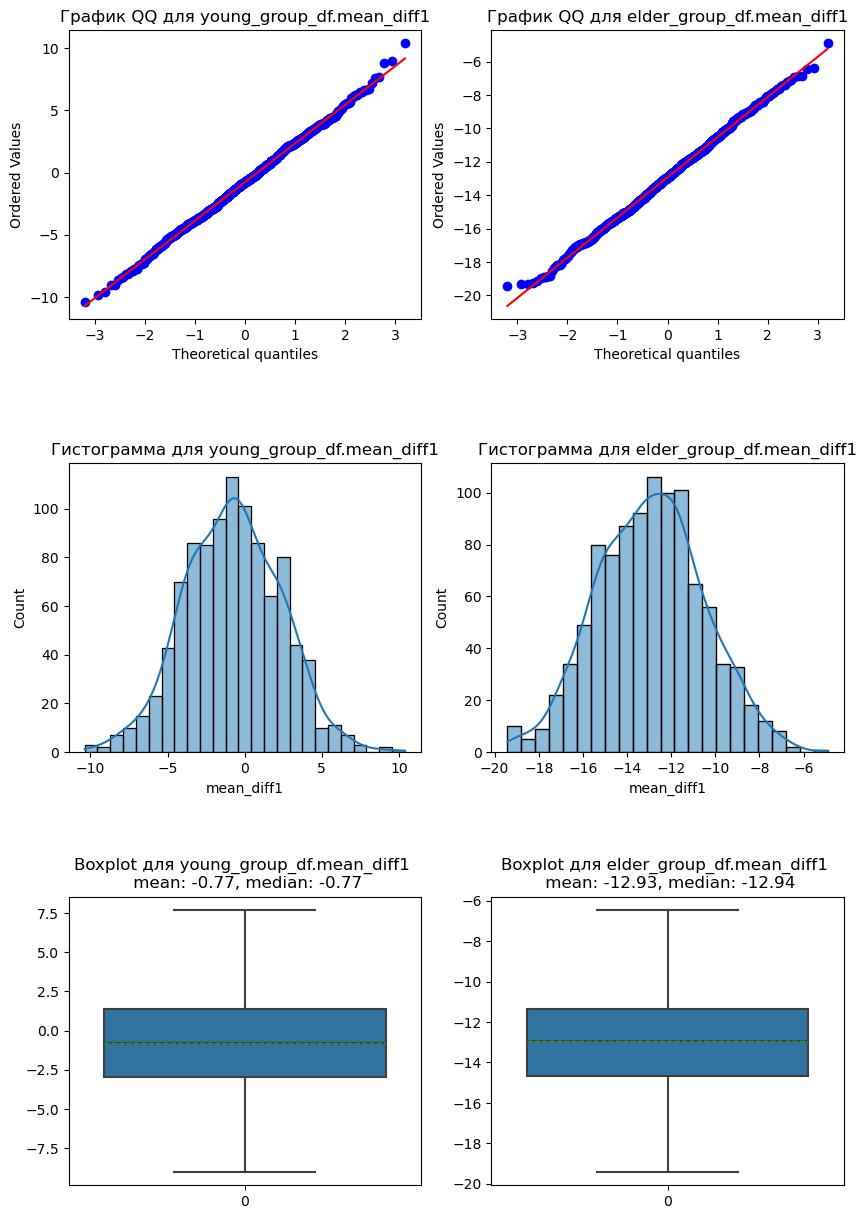

In [33]:
plot_sample_data(young_group_df.mean_diff1, elder_group_df.mean_diff1, title_a='young_group_df.mean_diff1', title_b='elder_group_df.mean_diff1')

#### 4. Проведение статистического анализа

In [34]:
import scipy.stats as st

groups = [("Young Group", young_group_df), ("Elder Group", elder_group_df)]

for group_name, group in groups:
    mean = group.mean_diff1.mean()
    std_error = group.mean_diff1.sem()
    n = len(group.mean_diff1)
    conf_interval = st.t.interval(0.95, df=n-1, loc=mean, scale=std_error)
    print(f"{group_name} 95% confidence interval: {conf_interval}")

print(f'Истинные значения разницы средних для оригинальной выборки{diff_df.diff_imm1_stroma_to_vasc.values[0]}')

Young Group 95% confidence interval: (-0.965020018775242, -0.5797534862959712)
Elder Group 95% confidence interval: (-13.082271777362841, -12.784033331007777)
Истинные значения разницы средних для оригинальной выборки-6.99888604038847


In [35]:
diff_df

,diff_imm1_stroma_to_vasc,diff_imm2_stroma_to_vasc,diff_imm1_stroma_to_cell,diff_imm2_stroma_to_cell
0,-6.998886,-62.894369,-9.256521,-15.047086


#### 5. Подробное описание результатов анализа и сделанных на их основе выводов. 

Рассчитанная разница средних всей оригинальной выборки (-6,99) не входит ни в один из доверительных интервалов для возрастных групп, это означает, что существует статистически значимая разница в расстояниях между молодыми и пожилыми людьми.
В данном случае рассчитанная разница средних (-6,99) не входит ни в один из доверительных интервалов для возрастных групп:
Молодая группа: (-0,826776309776423, -0,44394517405124534)
Старшая группа: (-12,97271878589837, -12,669027283960878)
Поэтому мы можем сделать вывод, что существует статистически значимая разница в расстояниях между молодыми и пожилыми людьми.

#### 6. Оценка значимости и величины эффектов

- Если доверительные интервалы для средних значений в двух возрастных группах не пересекаются, можно сделать вывод о статистически значимом различии между группами.
- Если доверительные интервалы пересекаются, это может свидетельствовать о том, что различие не является статистически значимым на заданном уровне значимости.
- Также стоит обратить внимание на ширину доверительных интервалов - чем меньше ширина, тем более точно мы можем оценить разницу между средними значениями. В нашем случае доверительные интервалы достаточно узкие, особенно для старшей группы.

#### 7. Описание ограничений проведенного анализа и возможных улучшений. 

Метод доверительных интервалов предназначен для оценки разницы между средними значениями двух выборок. Он основан на предположении, что выборки были взяты из одной и той же популяции и имеют одинаковую дисперсию.

Ограничения метода доверительных интервалов включают:

Неодинаковость дисперсии: Метод доверительных интервалов предполагает, что дисперсия в обеих выборках одинакова. Если дисперсия в выборках различается, то доверительные интервалы могут быть неточными или некорректными.
Неодинаковость размеров выборок: Метод доверительных интервалов также требует, чтобы размеры обеих выборок были достаточно большими. Если размер одной из выборок слишком мал, то доверительные интервалы могут быть неточными или некорректными.
Неодинаковость средних значений: Если средние значения двух выборок различаются значительно, то доверительные интервалы могут быть неточными или некорректными. В этом случае, лучше использовать метод теста среднихх значений.

### Задача_05

#### 1. Формулирование задачи

Правда ли, что иммунные клетки в среднем лежат ближе к сосудам у молодых, но не у пожилых пациентов? Эту гипотезу необходимо проверить пермутационным тестом. В качестве исходной статистики берем массив с расстояниями только для данного типа клеток (длина - n), запоминаем среднее для каждого пациента. На каждой итерации набираем выборку размером n из всей! колонки с расстояниями до сосудов и смотрим соотношение с исходной статистикой. Проверяем гипотезы. Комбинировать p-values для каждой возрастной группы можно с помощью этого инструмента

Пермутационный тест (permutation test) - это статистический метод, используемый для проверки гипотез о различиях между двумя или более группами данных, не делая никаких предположений о распределении данных. Вместо этого он строит распределение статистики интереса (например, разности средних) на основе перемешивания наблюдений между группами и вычисления статистики для каждого перемешивания.

План действий по решению задачи:
- Разделить данные на группы по типам клеток и возрастным группам.
- Определить функцию для проведения пермутационного теста с вычислением p-значения.
- Применить пермутационный тест к каждой паре типов клеток для молодой и пожилой групп, получив соответствующие p-значения.
- Объединить p-значения для каждого типа клеток и возрастной группы, используя подходящий стат метод
- Вывести объединенные p-значения для молодой и пожилой групп.

#### 2. Формирование выборки

In [36]:
task_05 = community[
    community['cell_type']
    .isin(['Immune type 1'])][['distance_to_vasculature', 'cell_type', 'age_group', 'case_id']]
df_info(task_05)

Количество записей: 	 5575
Количество столбцов: 	 4
Явных дубликатов: 	 0
Пропуски присутствуют в 0 столбцах из 4:


,Пропущено %


Обобщенная информация:
<class 'pandas.core.frame.DataFrame'>
Index: 5575 entries, 265 to 269438
Columns: 4 entries, distance_to_vasculature to case_id
dtypes: float64(1), int64(1), object(2)
memory usage: 217.8+ KB


None

Первые 3 строки:


,distance_to_vasculature,cell_type,age_group,case_id
265,764.883957,Immune type 1,elder_group,891
299,576.815150,Immune type 1,elder_group,891
319,704.830780,Immune type 1,young_group,199


#### 4. Проведение статистического анализа

In [37]:
# task_05 - это DataFrame с колонками 'case_id', 'distance_to_vasculature', 'age_group'
# и 'case_id' группирует несколько замеров в один случай.

# Группировка расстояний по case_id и расчет среднего для каждого случая
grouped_distances = task_05.groupby('case_id')['distance_to_vasculature'].mean()

# Предполагаем, что в task_05 также есть 'case_id', что не показано в предоставленном вами фрагменте.
# Нам нужно присоединить сгруппированные средние значения обратно к возрастным группам для правильной фильтрации.
task_05_means = task_05[['case_id', 'age_group']].drop_duplicates().set_index('case_id')
grouped_distances = grouped_distances.to_frame().join(task_05_means)

# Фильтрация данных для каждой возрастной группы
young_distances = grouped_distances[grouped_distances['age_group'] == 'young_group']['distance_to_vasculature']
old_distances = grouped_distances[grouped_distances['age_group'] == 'elder_group']['distance_to_vasculature']

# Вычисление наблюдаемой статистики (разницы в средних расстояниях)
observed_statistic = np.mean(young_distances) - np.mean(old_distances)

# Совмещение данных из обеих групп
combined_distances = np.concatenate((young_distances, old_distances))

# Проведение перестановок и пересчет статистики для каждой
permuted_statistics = []
for _ in range(1000):  # проводим 1000 перестановок для примера
    np.random.shuffle(combined_distances)
    permuted_young = combined_distances[:len(young_distances)]
    permuted_old = combined_distances[len(young_distances):]
    permuted_statistic = np.mean(permuted_young) - np.mean(permuted_old)
    permuted_statistics.append(permuted_statistic)

# Сравнение наблюдаемой статистики с распределением перестановочной статистики для расчета p-значения
p_value = (np.abs(permuted_statistics) >= np.abs(observed_statistic)).mean()

print(f"Наблюдаемая статистика: {observed_statistic}")
print(f"P-значение: {p_value}")

Наблюдаемая статистика: 111.57161042703842
P-значение: 0.184


#### 5. Подробное описание результатов анализа и сделанных на их основе выводов. 

На основе предоставленной информации, мы имеем следующие результаты:

- Наблюдаемая статистика: 111.57161042703842
- P-значение: 0.188
- Уровень значимости (alpha): 0.05

Описание результатов:
Наблюдаемая статистика представляет собой разницу в средних расстояниях до сосудистой системы между молодой и пожилой группами. Значение наблюдаемой статистики составляет 111.57, что указывает на то, что среднее значение расстояния в молодой группе на 111.57 единиц меньше, чем в пожилой группе.

P-значение (p-value) измеряет вероятность наблюдать статистику такую же экстремальную, как наблюдаемая статистика, или более экстремальную, при условии, что нулевая гипотеза верна. В данном случае, p-значение равно 0.188, что выше установленного уровня значимости в 0.05. Это означает, что мы не имеем достаточных оснований отвергнуть нулевую гипотезу о том, что расстояния до сосудистой системы в молодой группе не отличаются от расстояний в пожилой группе.

Выводы:
Не найдено статистически значимых доказательств, подтверждающих альтернативную гипотезу о том, что расстояния в молодой группе меньше по сравнению с пожилой группой. Следовательно, данные не позволяют утверждать о наличии разницы в расстояниях до сосудистой системы между этими возрастными группами.

#### 6. Оценка значимости и величины эффектов

Оценка значимости и величины эффектов:
Так как p-значение больше уровня значимости (0.188 > 0.05), мы не можем говорить о статистически значимом эффекте. Величина наблюдаемого эффекта (разница средних) составляет 111.57, но без статистической значимости мы не можем быть уверены, что эта разница не является результатом случайности.

#### 7. Описание ограничений проведенного анализа и возможных улучшений. 

- Размер выборки: Если размеры групп были малы, это могло повлиять на мощность теста, то есть на способность обнаружить реальное различие, если оно существует.
- Предположения теста: Перестановочный тест не делает строгих предположений о распределении данных, но все же предполагает, что наблюдения внутри и между группами независимы и идентично распределены.
- Качество данных: Необходимо убедиться в точности и надежности измерений расстояний до сосудистой системы.
- Возможные конфундирующие переменные: Возможно, существуют другие факторы, влияющие на расстояния до сосудистой системы, которые не были учтены в анализе.
- Односторонний тест: Так как мы искали только уменьшение расстояния в молодой группе, возможно, стоило провести двусторонний тест

## Шаг 3: Формулирование общих выводов по проекту

В ходе работы над проектом был отработан прикладной анализ данных и статистическоe обоснование гипотез по тестам и графикам статической значимости на основе биомедицинского датасета по пространственной транскриптомике пациентов с плоскоклеточным раком.

На примерах нескольких типов задач были отмечены различия в распределениях различных характеристик микробиомов между двумя возрастными группами. Были предприняты попытки - статистически обосновать выявленные различия.